# Loading data from "Benchmark dataset"

In [2]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
print(sys.executable)

/Users/arto/opt/anaconda3/envs/tensorflow/bin/python


In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [7]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [8]:
PROJECT_ROOT_DIR = "/Users/arto/Dropbox/Data" #this is the working directory for the project

In [9]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [10]:
cd /Users/arto/Dropbox/Data/BenchmarkDatasets/NoAuction/1.NoAuction_Zscore/NoAuction_Zscore_Training

/Users/arto/Dropbox/Data/BenchmarkDatasets/NoAuction/1.NoAuction_Zscore/NoAuction_Zscore_Training


In [11]:
ls

Test/                                Train_Dst_NoAuction_ZScore_CF_5.txt
Train_Dst_NoAuction_ZScore_CF_1.txt  Train_Dst_NoAuction_ZScore_CF_6.txt
Train_Dst_NoAuction_ZScore_CF_2.txt  Train_Dst_NoAuction_ZScore_CF_7.txt
Train_Dst_NoAuction_ZScore_CF_3.txt  Train_Dst_NoAuction_ZScore_CF_8.txt
Train_Dst_NoAuction_ZScore_CF_4.txt  Train_Dst_NoAuction_ZScore_CF_9.txt


In [13]:
dataset = pd.read_csv('Train_Dst_NoAuction_ZScore_CF_1.txt', delim_whitespace=True, header = None)

### Plot dataset

In [16]:
dataset.iloc[-5:,:].apply(pd.DataFrame.describe, axis =1)

,count,mean,std,min,25%,50%,75%,max
144,39512.0,1.990383,0.607220,1.0,2.0,2.0,2.0,3.0
145,39512.0,1.986080,0.691340,1.0,2.0,2.0,2.0,3.0
146,39512.0,1.979196,0.742504,1.0,1.0,2.0,3.0,3.0
147,39512.0,1.974514,0.805962,1.0,1.0,2.0,3.0,3.0
148,39512.0,1.964340,0.879848,1.0,1.0,2.0,3.0,3.0


In [17]:
dataset_max = dataset.apply(pd.DataFrame.max, axis = 1)

#### Max

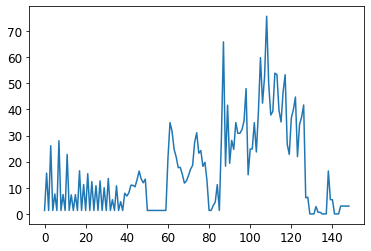

In [18]:
plt.plot(dataset_max.values)

#### Min


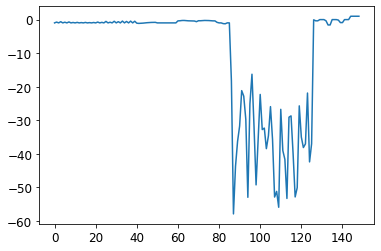

In [19]:
plt.plot(dataset.apply(pd.DataFrame.min, axis =1 ))

#### StDev

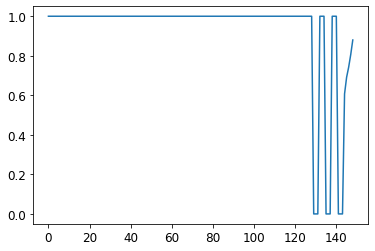

In [20]:
plt.plot(dataset.apply(pd.DataFrame.std, axis = 1))

#### Mean


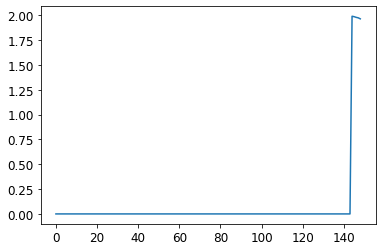

In [21]:
plt.plot(dataset.apply(pd.DataFrame.mean, axis = 1))

#### Median


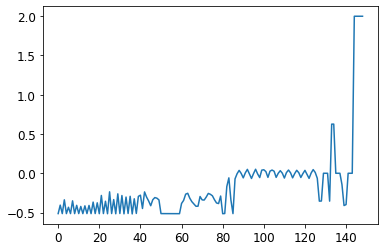

In [22]:
plt.plot(dataset.apply(pd.DataFrame.median, axis =1))

### Preprocessing not required

Since the dataset has already been normalised, no further processing is required.


## Model

https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170601153214969115


The given files contain both the feature set and the labels. From row 1 to row 144 we provide the features (see 'Benchmark Dataset for Mid-Price Prediction of Limit Order Book Data' for the description) and from row 145 to row 149 we provide labels for 5 classification problems. Labels (row 145 to the end) have the following explanation ‘1’ is for up-movement, ‘2’ is for stationary condition and ‘3’ is for down-movement.
 

Ntakaris et al. 2018: "Benchmark dataset for mid-price forecasting of limit order book data with machine learning methods"

We formulated five classification tasks based on mid-price movement predictions for 1, 2, 3, 5, and 10 predicted horizons.


Ntakaris et al. 2018. page 9:

Our labels describe the percentage change of the mid-price, which is calculated as follows:

[formula]

where $m_j$ is the future mid-price (k = 1, 2, 3, 5, or 10 next events in our representations) and $m_i$ is the current mid-price. The extracted labels are based on a threshold for the percentage change of 0.002. For percentage changes equal to or greater than 0.002, we use label 1. For percentage change that varies from −0.00199 to 0.00199, we use label 2, and, for percentage change smaller or equal to −0.002, we use label 3.

+- 0.2 bps is unchanged.


In [27]:
dataset.shape

(149, 39512)

In [42]:
X_train = dataset.iloc[:144, :20000]

In [43]:
X_valid = dataset.iloc[:144, 20000:]

In [72]:
y_train = dataset.iloc[-5, :20000]

In [73]:
y_valid = dataset.iloc[-5, 20000:]

In [74]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(20000, 144)
(19512, 144)
(20000,)
(19512,)


In [54]:
print(y_train.iloc[1,:].shape)

(20000,)


In [55]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation = "relu"))


In [56]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])

In [75]:
y_train = np.asarray(y_train)

In [76]:
X_train = np.asarray(X_train)

In [77]:
y_valid = np.asarray(y_valid)

In [78]:
X_valid = np.asarray(X_valid)

In [79]:
X_valid = X_valid.transpose()
y_valid = y_valid.transpose()
X_train = X_train.transpose()
y_train = y_train.transpose()


In [80]:
print(X_valid.shape)
print(y_valid.shape)
print(X_train.shape)
print(y_train.shape)

(144, 19512)
(19512,)
(144, 20000)
(20000,)


In [81]:
print(type(X_valid))
print(type(y_valid))
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [82]:
history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid))

ValueError: Error when checking input: expected simple_rnn_input to have 3 dimensions, but got array with shape (144, 20000)

In [83]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))


ValueError: Error when checking input: expected simple_rnn_3_input to have 3 dimensions, but got array with shape (144, 20000)

In [80]:
X_train.shape

(200000, 140, 1)

In [79]:
X_train = X_train.reshape(200000, 140, 1)

In [86]:
y_train.shape

(200000, 1)

In [85]:
y_train = y_train.reshape(200000, 1)

In [87]:
X_valid.shape

(110228, 140)

In [88]:
X_valid = X_valid.reshape(110228, 140, 1)

In [92]:
y_valid.shape

(1, 110228)

In [93]:
y_valid = y_valid.reshape(110228,1)

## Config

NameError: name 'tf' is not defined